In [11]:
import pathlib
import pandas as pd
import Levenshtein 
import numpy as np
csvs = pathlib.Path("./sample_generated_tweets/").glob("*.csv")

original_tweets = pd.read_fwf(r"./dataset/combined_Musk_tweets_cleaned.txt", header = None)
original_tweets.columns = ['text']

In [3]:

results = []
for csv in csvs:
    dists = []
    sims = [] 
    result = {}
    generated_tweets = pd.read_csv(csv,index_col=0)
    #display(original_tweets)
    #display(generated_tweets)
    for generated_tweet in generated_tweets["output"]:
        min_dist = np.inf
        min_sim = 0#np.inf
        most_similar_original = ""
        for original_tweet in original_tweets["text"]:
            s = Levenshtein.ratio(original_tweet, generated_tweet)
            d = Levenshtein.distance(original_tweet, generated_tweet)
            if d < min_dist:
                min_dist = d
                most_similar_original = original_tweet
            if s > min_sim:
                min_sim = s
                #most_similar_original = original_tweet
        dists.append(min_dist)
        sims.append(min_sim)
    result["name"] = csv.name
    result["avg_dist"] = np.mean(dists)
    result["avg_sim"] = np.mean(sims)
    results.append(result)
    #print(f"{csv.name}: {np.mean(dists)}")

KeyboardInterrupt: 

In [6]:
results

[{'name': 'gpt2_net_scratch.csv',
  'avg_dist': 81.76923076923077,
  'avg_sim': 0.5095877521466777},
 {'name': 'rnn_scratch_gpt2-trained.csv',
  'avg_dist': 145.8846153846154,
  'avg_sim': 0.4628242648889149},
 {'name': 'gpt2_fine_tuned.csv',
  'avg_dist': 88.65384615384616,
  'avg_sim': 0.5161782374115638},
 {'name': 'lstm_gpt2.csv', 'avg_dist': 142.5, 'avg_sim': 0.4569192518692698},
 {'name': 'lstm_word.csv',
  'avg_dist': 188.19230769230768,
  'avg_sim': 0.4547424942677725},
 {'name': 'lstm_char.csv',
  'avg_dist': 31.923076923076923,
  'avg_sim': 0.5526066699099328},
 {'name': 'rnn_scratch_char.csv',
  'avg_dist': 31.384615384615383,
  'avg_sim': 0.5579131556248119},
 {'name': 'gru_word.csv',
  'avg_dist': 183.42307692307693,
  'avg_sim': 0.4745019060959654},
 {'name': 'gru_gpt2.csv',
  'avg_dist': 150.3846153846154,
  'avg_sim': 0.47154735437454476},
 {'name': 'gpt2_tokenizer_scratch.csv',
  'avg_dist': 81.11538461538461,
  'avg_sim': 0.49554649653447125},
 {'name': 'gru_gpt2-trai

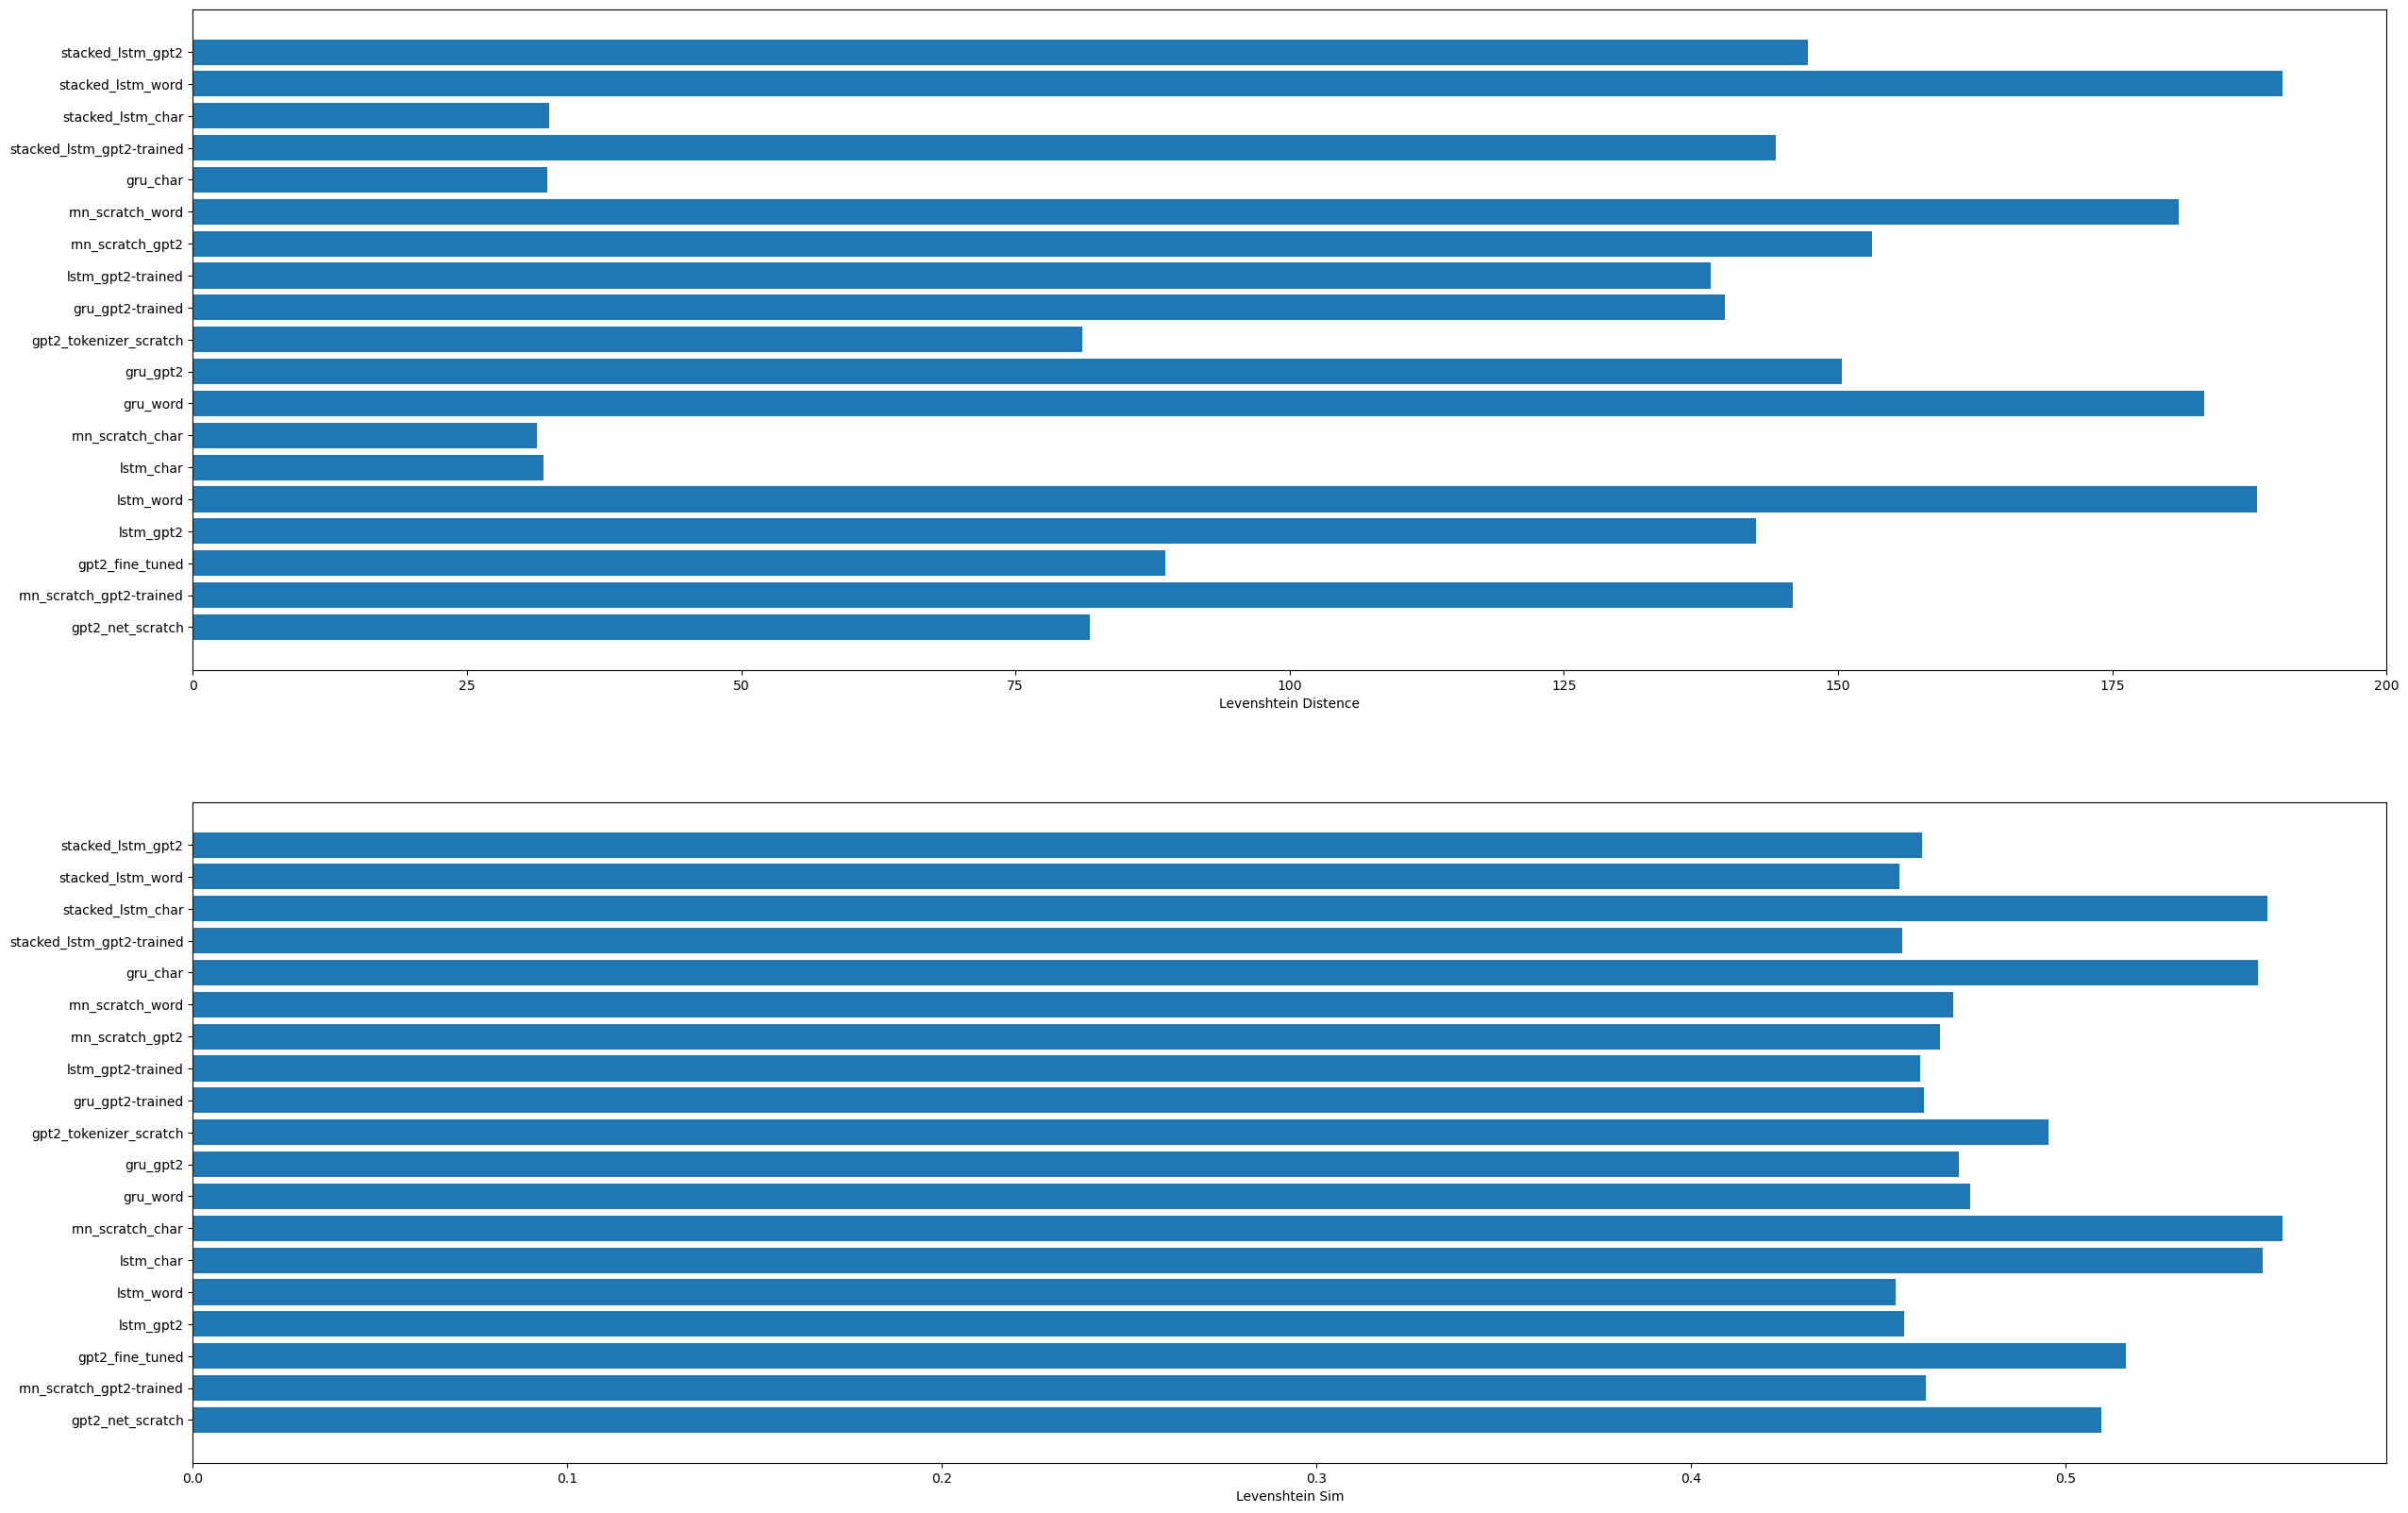

In [165]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

name = []
avg_dist = []
avg_sim = []
for result in results:
    name.append(result["name"].replace(".csv",""))
    avg_dist.append(result["avg_dist"])
    avg_sim.append(result["avg_sim"])
y_pos = np.arange(len(name))

fig = plt.figure(figsize=(30,20)) 
#plt.tick_params(axis='x', labelsize=8)
plt.subplot(2,1,1)
plt.barh(y_pos, avg_dist, align='center')
plt.yticks(y_pos, name)
plt.xlabel('Levenshtein Distence')


plt.subplot(2,1,2)
plt.barh(y_pos, avg_sim, align='center')
plt.yticks(y_pos, name)
plt.xlabel('Levenshtein Sim')
#plt.title('Programming language usage')

plt.show()

In [12]:
name = []
avg_dist = []
avg_sim = []
for result in results:
    name.append(result["name"].replae)
    avg_dist.append(result["avg_dist"])
    avg_sim.append(result["avg_sim"])

In [51]:
from transformers import pipeline
from transformers import AutoModel, AutoTokenizer 

model_name = "cardiffnlp/twitter-roberta-base-sentiment" 
model = AutoModel.from_pretrained(model_name)
sentiment_task = pipeline("sentiment-analysis", model=model_name, tokenizer=model_name)

csvs = pathlib.Path("./sample_generated_tweets/").glob("*.csv")

original_tweets = pd.read_fwf(r"./dataset/combined_Musk_tweets_cleaned.txt", header = None)
original_tweets.columns = ['text']
sentiment_results = []
for csv in csvs:
    generated_tweets = pd.read_csv(csv,index_col=0) 
    data = generated_tweets["output"].tolist()
    result = sentiment_task(data)
    result.append(csv.name)
    sentiment_results.append(result)




Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment were not used when initializing RobertaModel: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictio

In [128]:
data = original_tweets["text"].tolist()
original_tweets_sentiment_results = sentiment_task(data)

In [76]:
def sentiment(sentiment_result):

    Negative, Neutral, Positive = 0, 0, 0
    result={}
    for i in sentiment_result:
        if isinstance(i, dict):
            if i["label"]== "LABEL_0":
                Negative += 1
            if i["label"]== "LABEL_1":
                Neutral += 1
            if i["label"]== "LABEL_2":
                Positive += 1
        if isinstance(i, str):
            result["name"] = i
    result["Negative"]=Negative/(len(sentiment_result)-1)
    result["Neutral"]=Neutral/(len(sentiment_result)-1)
    result["Positive"]=Positive/(len(sentiment_result)-1)
    return result

In [145]:

original_tweets_result = sentiment(original_tweets_sentiment_results)
    

In [79]:
sentiment_gen_result_count = []
for sentiment_result in sentiment_results:
    result = sentiment(sentiment_result)
    sentiment_gen_result_count.append(result)

In [146]:
sentiment_gen_result_count.append(original_tweets_result)

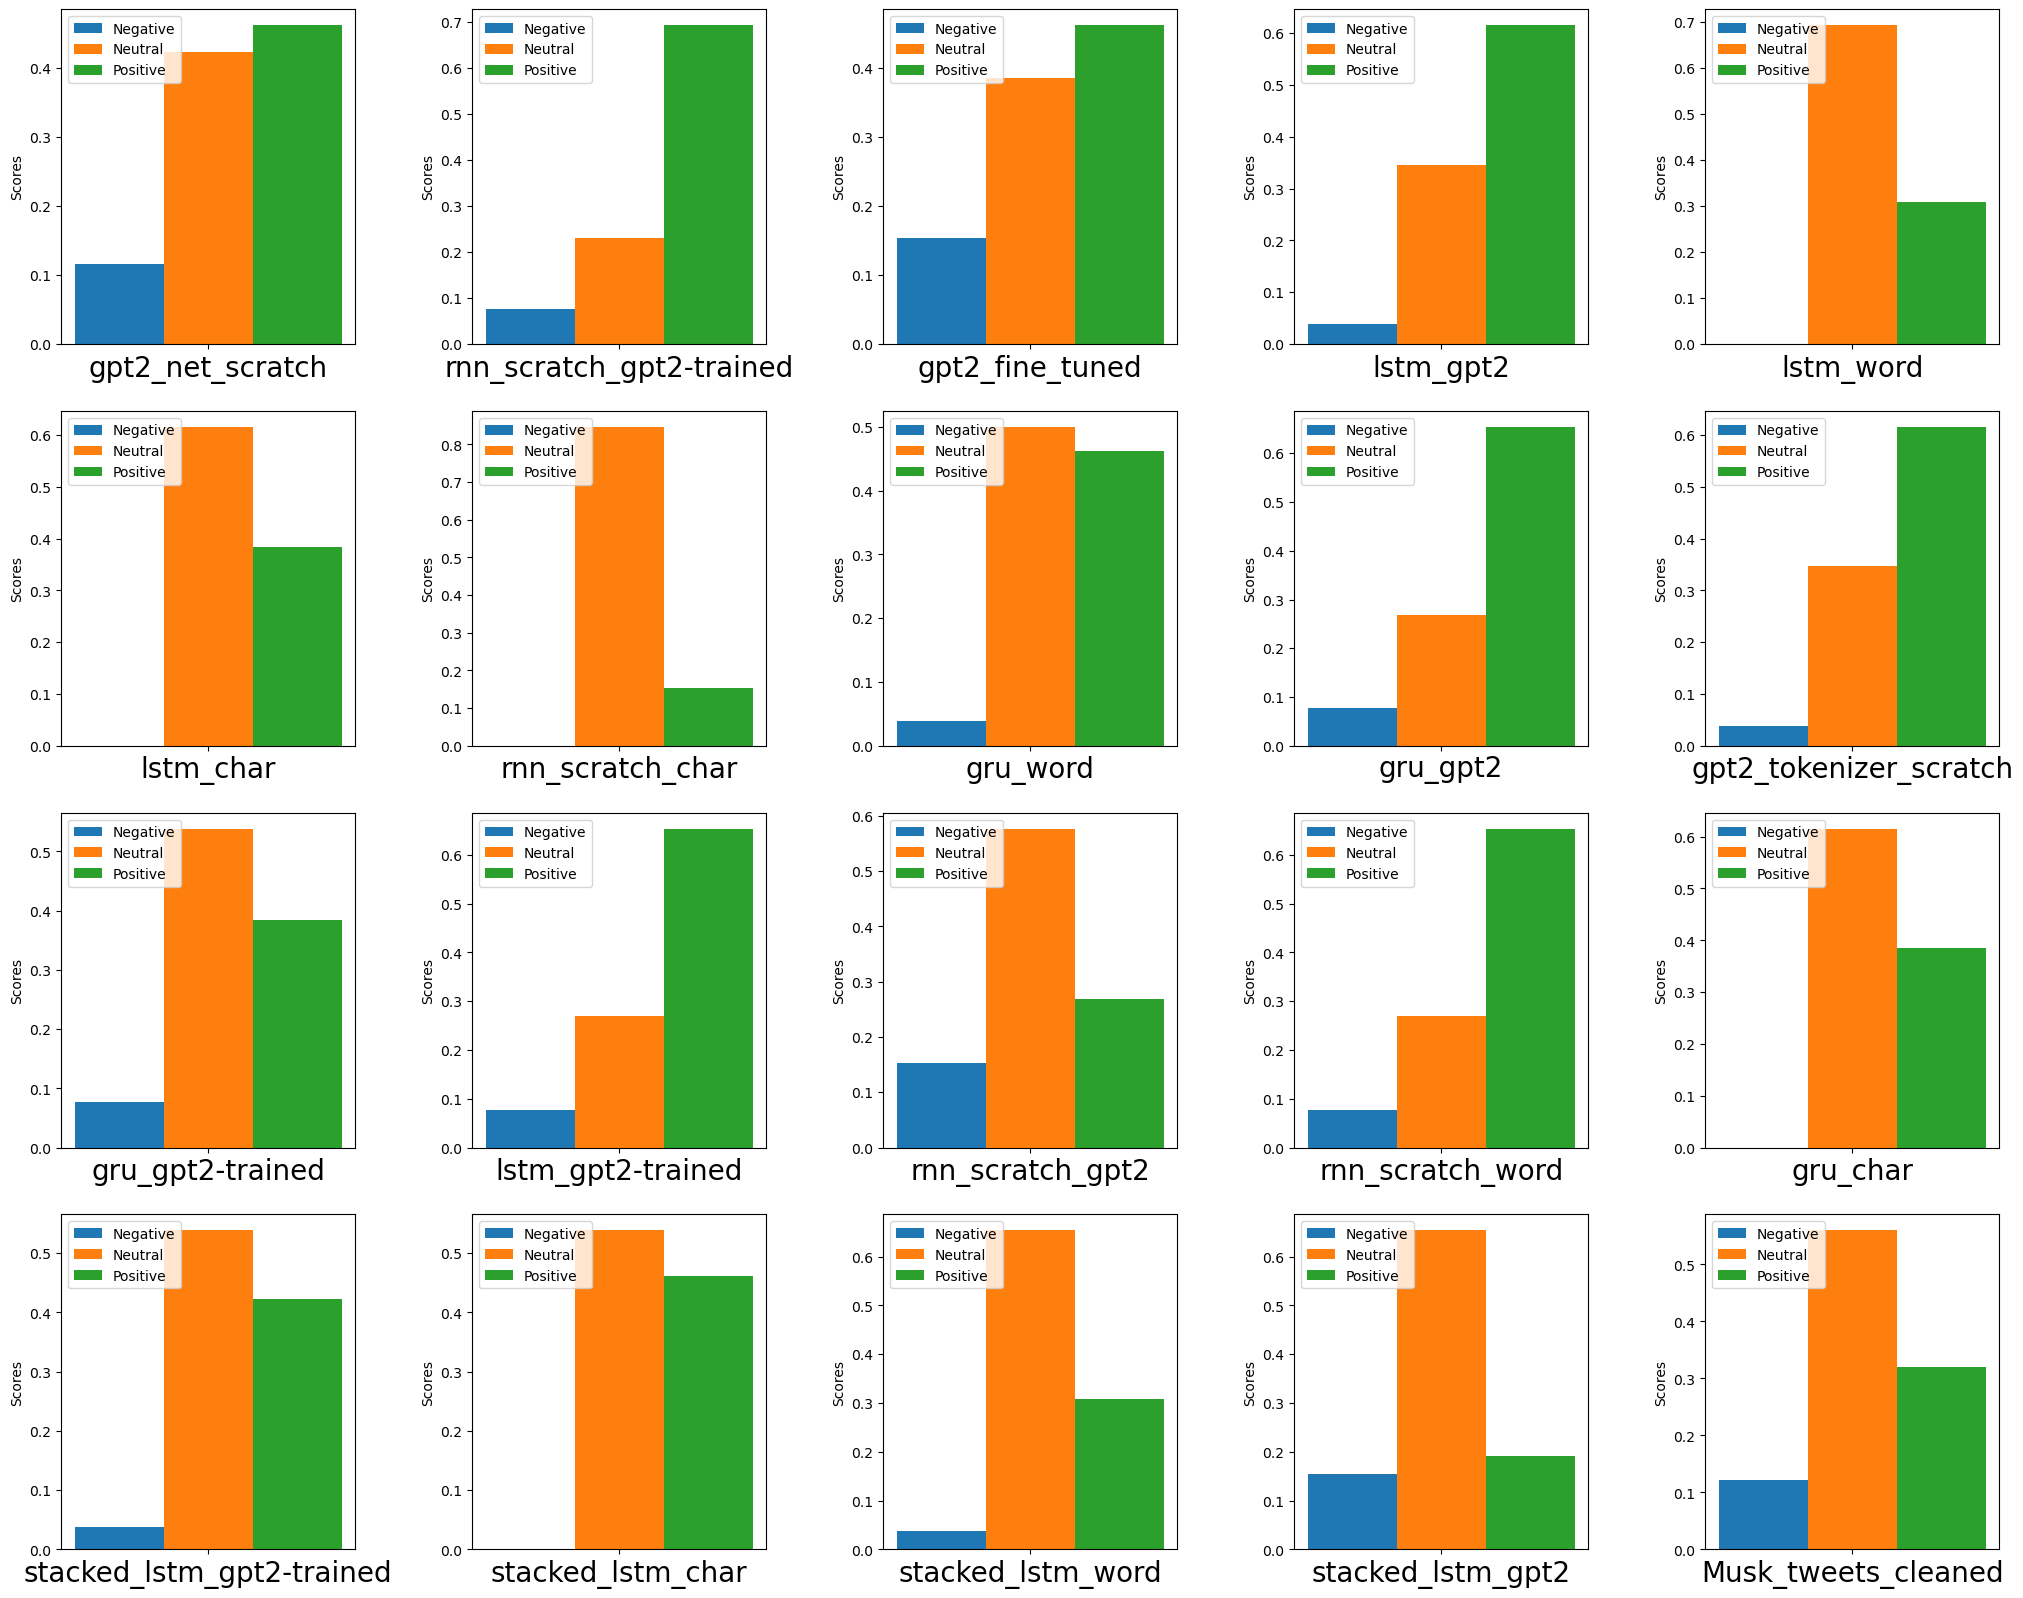

In [176]:
plt.figure(figsize=(25,20))
init = 1
for element in sentiment_gen_result_count:
    plt.subplot(4,5,init)
    plt.subplots_adjust(wspace =0.4, hspace =0.2)
    init += 1
    labels = []
    Y1= []
    Y2= []
    Y3= []
    
    labels.append(element['name'].replace(".csv",""))
    x = np.arange(len(labels))
    Y1.append(element['Negative'])
    Y2.append(element['Neutral'])
    Y3.append(element['Positive'])
    width = 0.01  # 柱子的宽度

    plt.bar(x - width, Y1, width=width, label='Negative')
    plt.bar(x, Y2, width=width, label='Neutral')
    plt.bar(x + width, Y3, width=width, label='Positive')
    plt.ylabel('Scores')
    #plt.title('3 datasets')
    # x轴刻度标签位置不进行计算
    plt.xticks(x, labels=labels)
    plt.rc('xtick', labelsize=20) 
    plt.legend(loc='upper left')


In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
#titles_table = pd.read_csv("../input/ForumTopics.csv")

def wordCloudFunction(df,column,numWords):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english") and w not in [";",".","%"] ]
    plt.barh(range(5), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:5])])
    plt.xticks([])
    plt.yticks([x  for x in range(5)], reversed(popular_words_nonstop[0:5]))
    #plt.title(title)
    print(title)
    plt.show()

gpt2_net_scratch.csv


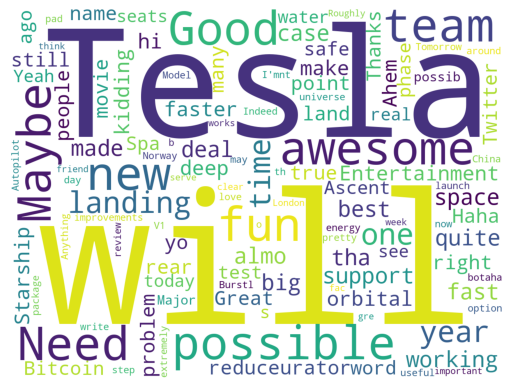

rnn_scratch_gpt2-trained.csv


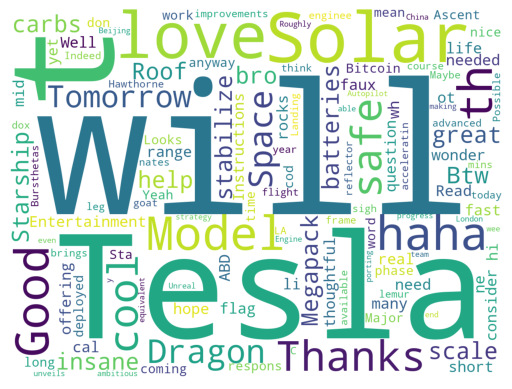

gpt2_fine_tuned.csv


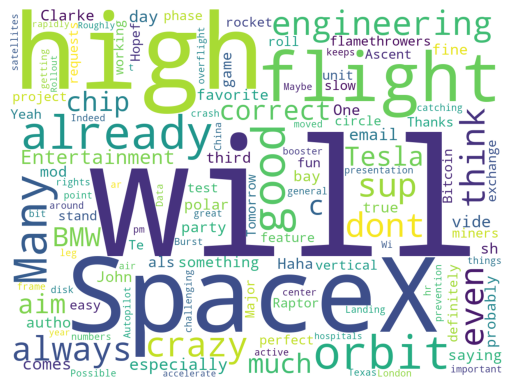

lstm_gpt2.csv


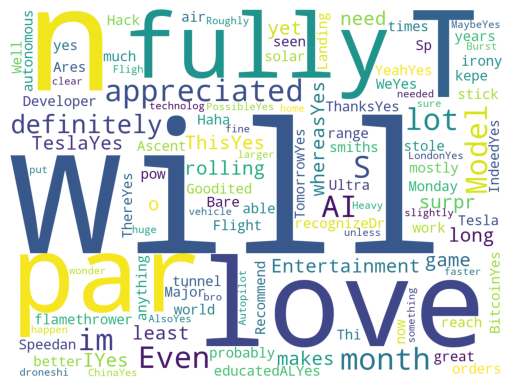

lstm_word.csv


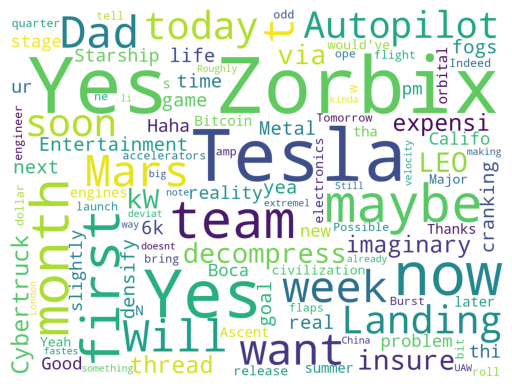

lstm_char.csv


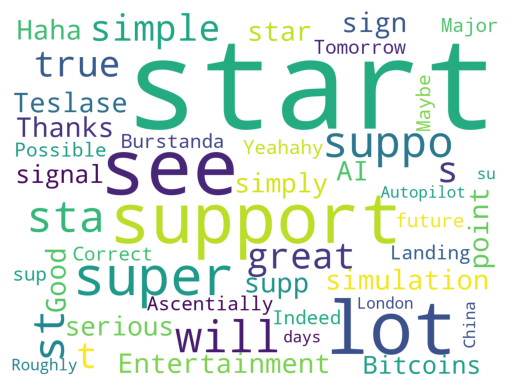

rnn_scratch_char.csv


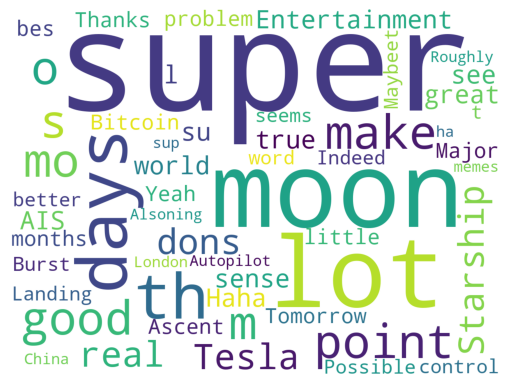

gru_word.csv


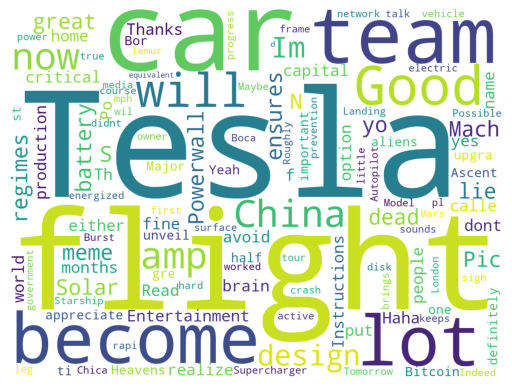

gru_gpt2.csv


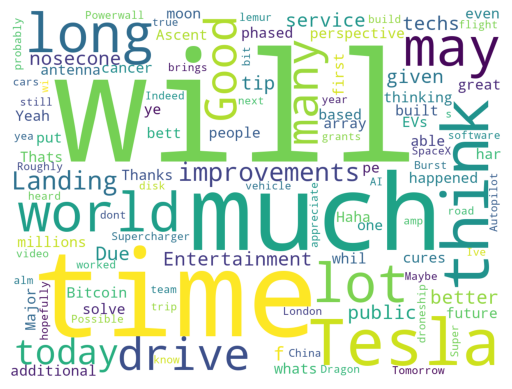

gpt2_tokenizer_scratch.csv


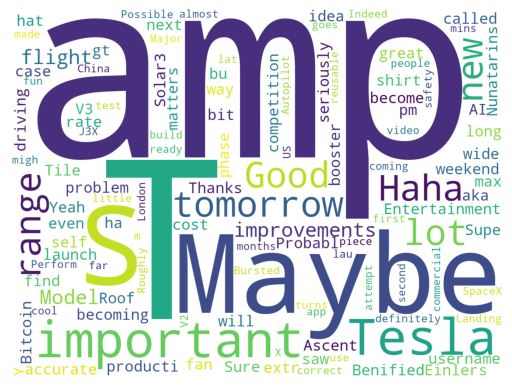

gru_gpt2-trained.csv


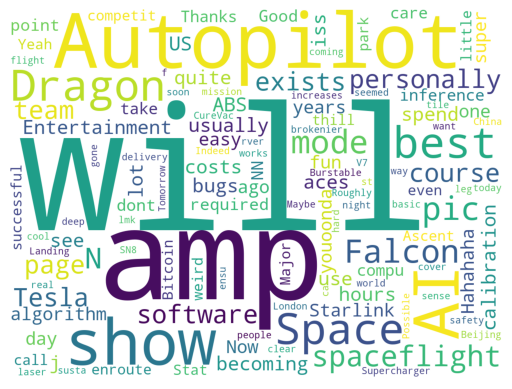

lstm_gpt2-trained.csv


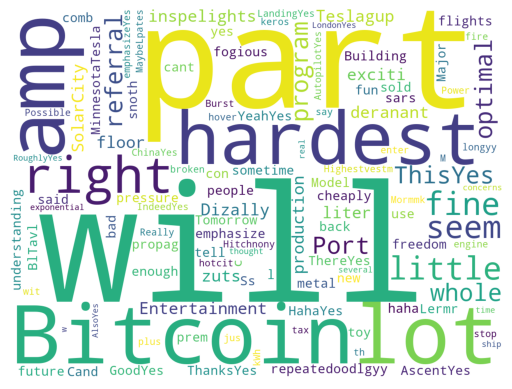

rnn_scratch_gpt2.csv


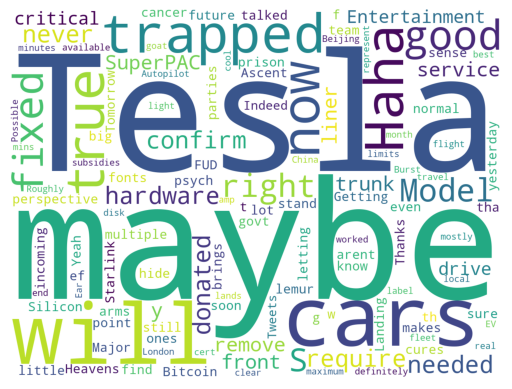

rnn_scratch_word.csv


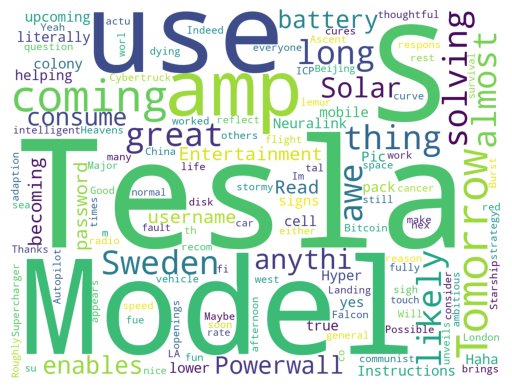

gru_char.csv


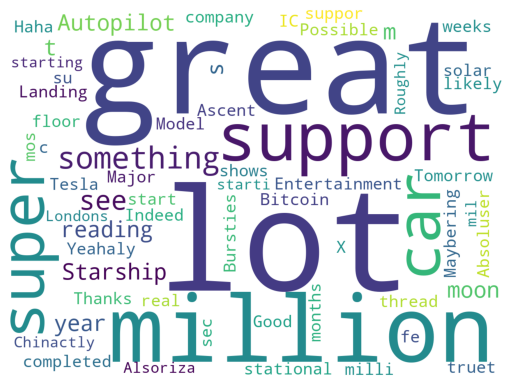

stacked_lstm_gpt2-trained.csv


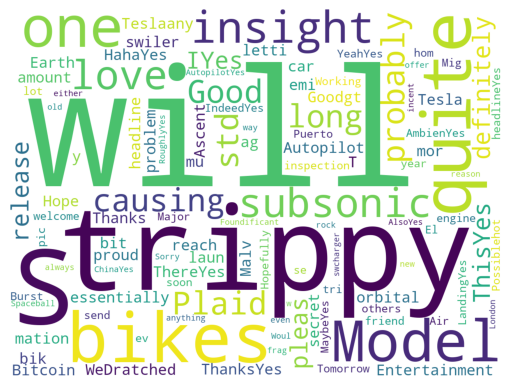

stacked_lstm_char.csv


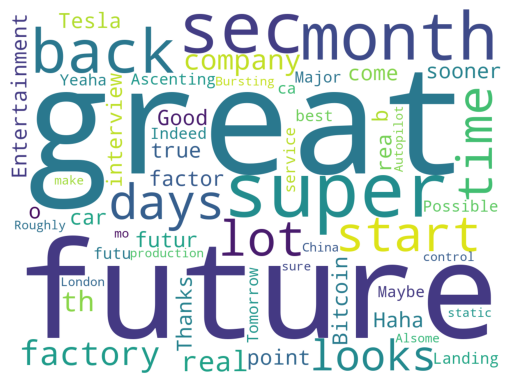

stacked_lstm_word.csv


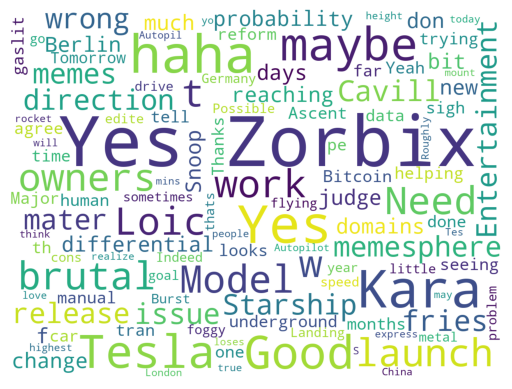

stacked_lstm_gpt2.csv


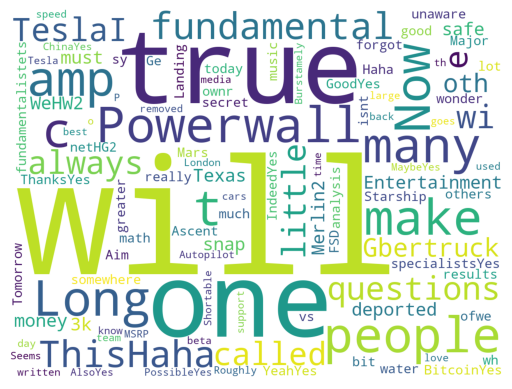

In [174]:
csvs = pathlib.Path("./sample_generated_tweets/").glob("*.csv")
for csv in csvs:
    generated_tweets = pd.read_csv(csv,index_col=0)
    wc = wordcloud.WordCloud(
            width=1200,
            height=900,
            background_color='white')
    wc.generate(generated_tweets["output"].to_string(index=False))
    #wc.to_file(f'wordcloud/Musk_gen.png')
    print(csv.name)
    plt.clf()
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

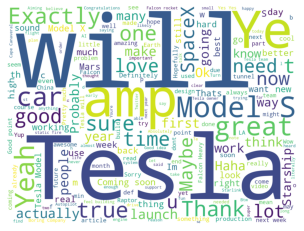

In [7]:
import wordcloud

wc = wordcloud.WordCloud(
            width=1200,
            height=900,
            background_color='white')
wc.generate(original_tweets["text"].to_string(index=False))
#wc.to_file(f'wordcloud/Musk_gen.png')
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

Popular Words in original tweets


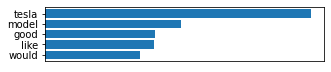

In [19]:
plt.figure(figsize=(5,1))
wordBarGraphFunction(original_tweets,'text',"Popular Words in original tweets")
#plt.figure(figsize=(15,15))
#wordCloudFunction(original_tweets,'text',10000000)

rnn_scratch_gpt2-trained
Popular Words in rnn_scratch_gpt2-trained generated tweets


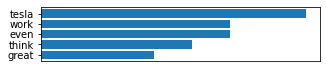

In [30]:
csvs = pathlib.Path("./sample_generated_tweets/").glob("*.csv")
for csv in csvs:
    if "rnn_scratch_gpt2-trained" in csv.name:
        generated_tweets = pd.read_csv(csv,index_col=0)

        plt.figure(figsize=(5,1))
        name = csv.name.replace(".csv", "")
        print(name)
        #if name == "lstm_char" or name == "stacked_lstm_char" or name == "rnn_scratch_char" or name == "gru_char":
        #    continue
        wordBarGraphFunction(generated_tweets,'output',f"Popular Words in {name} generated tweets")
        #plt.show()
        #plt.figure(figsize=(5,1))
        #wordCloudFunction(original_tweets,'text',10000000)